# ASSESSMENT 1 

## 1) Import pandas and read in the banklist.csv file into a dataframe called banks.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
b = pd.read_csv('banklist.csv')

## 2) Show the head of the dataframe.

In [2]:
print(b.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


## 3) What are the column names?

In [3]:
print(b.columns)

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')


## 4) How many States (ST) are represented in this data set?

In [4]:
n = len(b['ST'].unique())

print(n)

44


## 5) Get a list or array of all the states in the data set.

In [5]:
s = b['ST'].tolist()

u = list(set(s))

print("List of all states in the dataset:",u)

List of all states in the dataset: ['KS', 'MA', 'NM', 'AZ', 'PR', 'SD', 'CT', 'NV', 'MN', 'WV', 'OK', 'VA', 'NY', 'WA', 'MI', 'IN', 'GA', 'AR', 'AL', 'ID', 'CO', 'FL', 'KY', 'WY', 'WI', 'LA', 'HI', 'NE', 'MS', 'OR', 'NJ', 'CA', 'MO', 'OH', 'NH', 'SC', 'TX', 'IA', 'NC', 'IL', 'PA', 'TN', 'MD', 'UT']


## 6) What are the top 5 states with the most failed banks?

In [6]:
f = b['ST'].value_counts()

t = f.head(5)

print("Top 5 states with the most failed banks:")
print(t)

Top 5 states with the most failed banks:
ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


## 7) What are the top 5 acquiring institutions?

In [7]:
f = b['Acquiring Institution'].value_counts()

t = f.head(5)

print("Top 5 acquiring institutions:")
print(t)

Top 5 acquiring institutions:
Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


## 8) How many banks has the State Bank of Texas acquired? How many of them were actually in Texas?

In [8]:
s = b[b['Acquiring Institution'] == 'State Bank of Texas']
a = s.shape[0]
n = s[s['ST'] == 'TX'].shape[0]
print(f"State Bank of Texas acquired {a} banks, {n} of which were in Texas.")

State Bank of Texas acquired 3 banks, 1 of which were in Texas.


## 9) What is the most common city in California for a bank to fail in?

In [9]:
g = b[b["ST"] == "CA"]

c = g['City'].value_counts().idxmax()

print("Most Common City In California: ",c)

Most Common City In California:  Los Angeles


# assesment 2

## Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

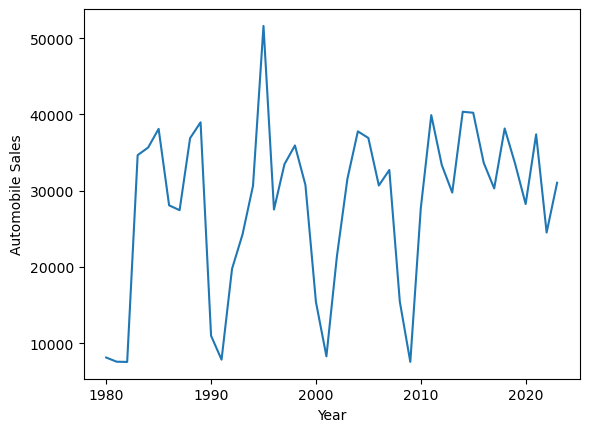

In [2]:
op = pd.read_csv(r"C:\Users\admin\Downloads\historical_automobile_sales.csv")
op.groupby("Year")['Automobile_Sales'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.show()

## Q 2: Plot different lines for categories of vehicle type and analyze the trend
## to answer the question Is there a noticeable difference in sales trends
## between different vehicle types during recession periods? 


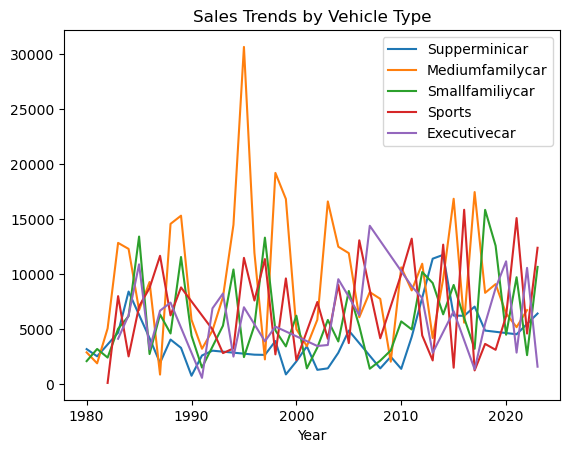

In [4]:
for vehicle_type in op['Vehicle_Type'].unique():
    subset = op[op['Vehicle_Type'] == vehicle_type]
    subset.groupby('Year')['Automobile_Sales'].sum().plot(label=vehicle_type)
plt.title('Sales Trends by Vehicle Type')
plt.legend()
plt.show()


## Q 3: Use the functionality of Seaborn Library to create a visualization to compare
## the sales trend per vehicle type for a recession period with a non- recession
## period. 


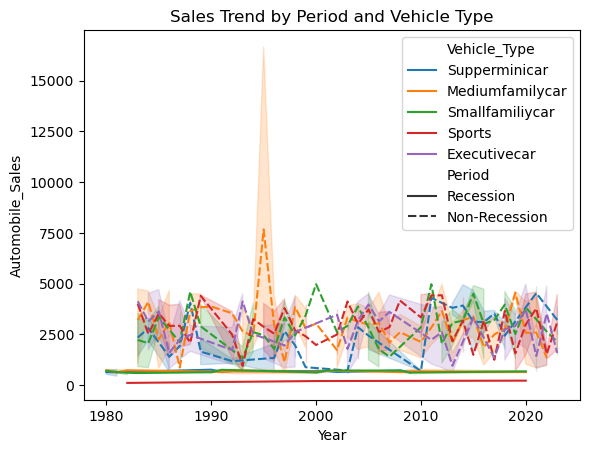

In [5]:
op['Period'] = op['Recession'].apply(lambda x: 'Recession' if x else 'Non-Recession')
sns.lineplot(data=op, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period')
plt.title('Sales Trend by Period and Vehicle Type')
plt.show()

# Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period. 

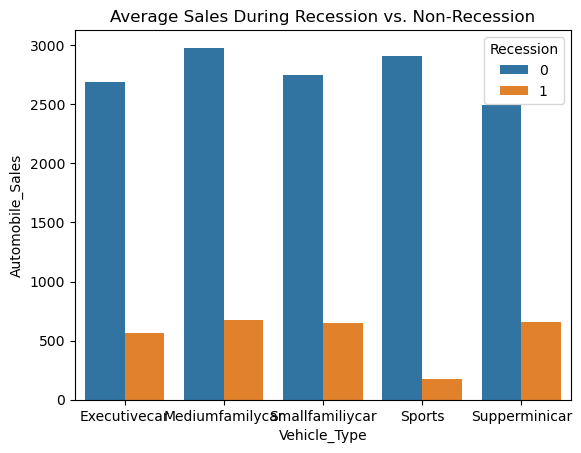

In [3]:
grouped = op.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=grouped)
plt.title('Average Sales During Recession vs. Non-Recession')
plt.show()
